In [24]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite?check_same_thread=False")

In [27]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [28]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23')

In [32]:
date = str(start_date)[2:-3]
end_date = str(eval(date[0:4])-1) + date[4:]
end_date

'2016-08-23'

In [33]:
# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').all()
precipitation_query

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_query_df = pd.DataFrame(precipitation_query, columns=['date', 'prcp'])
precipitation_query_df['date'] = pd.to_datetime(precipitation_query_df['date'], format='%Y/%m/%d')
precipitation_query_df.sort_values(by=['date'])
precipitation_query_df.set_index('date', inplace=True)
precipitation_query_df.dropna(inplace=True)
precipitation_query_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


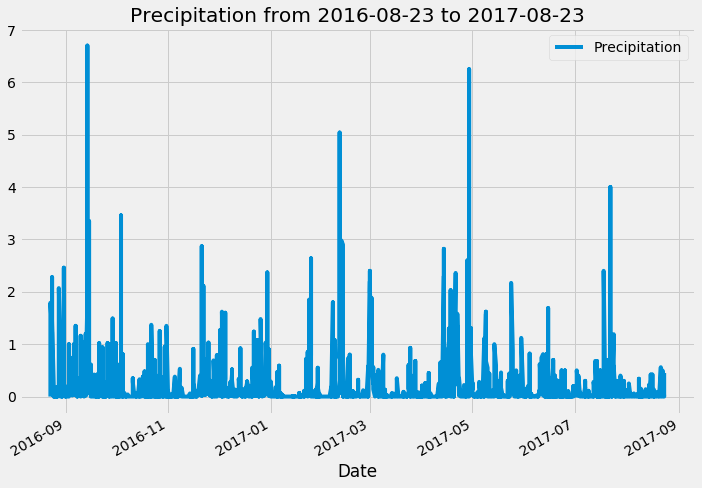

In [42]:
# Use Pandas plotting with Matplotlib to plot the data
precipitation_query_df.plot(use_index=True, y='prcp', figsize=(10,7))
plt.xlabel('Date')
plt.title('Precipitation from 2016-08-23 to 2017-08-23')
plt.legend(['Precipitation'], loc=0)
plt.tight_layout()
plt.savefig('images/Precipitation.png')
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_query_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [44]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
stations

9

In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for stations in active_stations:
    print(stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = session.query(Station.id, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_station

[(1, 54.0, 85.0, 71.66378066378067)]

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram.
highest_observations = session.query(Measurement.tobs).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()
highest_observations

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

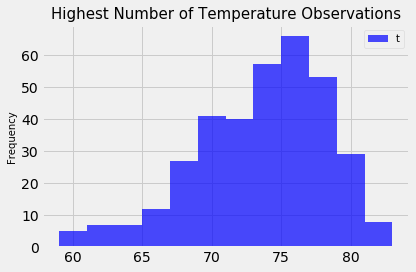

In [48]:
highest_observations_df = pd.DataFrame(highest_observations, columns=['temp'])
plt.hist(highest_observations_df['temp'], bins=12, color='blue', alpha=.7)
plt.title('Highest Number of Temperature Observations', fontsize=15)
plt.ylabel("Frequency", fontsize=10)
plt.legend('tobs', fontsize=10)
plt.tight_layout()
plt.savefig('images/HighestObservations.png')
plt.show()

In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax.
# For your trip using the previous year's data for those same dates.
trip_start_date = '2018-08-03'
trip_end_date = '2018-08-17'

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function usage example
print(calc_temps('2017-08-03', '2017-08-17'))

[(70.0, 78.91803278688525, 84.0)]


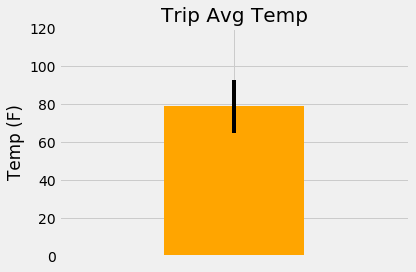

In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.xlim(0, 2)
plt.ylim(0, 120)
plt.bar(1, 78.9, color='orange', yerr=14, tick_label='', align='center')
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp', fontsize=20)
plt.tight_layout()
plt.savefig('images/Temperature.png')
plt.show()

In [51]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation.
trip_query = session.query(Station.station, func.sum(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation).filter(Measurement.date >= '2017-08-03').filter(Measurement.date <= '2017-08-17').group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
print(trip_query)

[('USC00511918', 2.97, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), ('USC00513117', 2.97, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00514830', 2.97, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00516128', 2.97, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00517948', 2.97, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), ('USC00518838', 2.97, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), ('USC00519281', 2.97, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00519397', 2.97, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00519523', 2.97, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)]


In [52]:
from flask import Flask, json, jsonify

In [53]:
app = Flask(__name__)

In [56]:
@app.route("/")
def home_route():
    return(
        f"Available Routes: <br/>"
        f"/api/v1.0/precipitation <br/>"
        f"/api/v1.0/stations <br/>"
        f"/api/v1.0/tobs <br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )

AssertionError: View function mapping is overwriting an existing endpoint function: home_route

In [57]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    prcp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2017-01-01').all()
    prcp_dict = dict(prcp)
    print("Precipitation")
    return jsonify(prcp_dict)

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    stations = session.query(Station.station).all()
    stations_list = list(np.ravel(stations))
    return jsonify(stations_list)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    temp = session.query(Measurement.tobs).order_by(Measurement.date).all()
    print("Temperature")
    return jsonify(temp)

In [ ]:
@app.route("/api/v1.0/<start>")
def start_date(start):
    start_date = session.query(Station.id, Station.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start).group_by(Station.station).order_by(Station.id).all()
    print("Start date ({start})")
    return jsonify(start_date)

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def start_end_date(start, end):
    start_end_date = session.query(Station.id, Station.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).group_by(Station.station).order_by(Station.id).all()
    print("Start date ({start}) and end date ({end})")
    return jsonify(start_end_date)

In [ ]:
if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Apr/2019 00:53:14] "GET /api/v1.0/2017-08-01/2017-08-07 HTTP/1.1" 200 -


Start date ({start}) and end date ({end})


127.0.0.1 - - [23/Apr/2019 00:53:16] "GET /api/v1.0/2017-08-01 HTTP/1.1" 200 -


Start date ({start})


127.0.0.1 - - [23/Apr/2019 00:53:18] "GET /api/v1.0 HTTP/1.1" 404 -
127.0.0.1 - - [23/Apr/2019 00:53:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Apr/2019 00:53:29] "GET /api/v1.0/2017-08-01 HTTP/1.1" 200 -


Start date ({start})


127.0.0.1 - - [23/Apr/2019 00:53:30] "GET /api/v1.0/precipitation HTTP/1.1" 200 -


Precipitation


127.0.0.1 - - [23/Apr/2019 00:53:39] "GET /api/v1.0/precipitation HTTP/1.1" 200 -


Precipitation


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
